In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/finetuning_model.pth.zip -d /content

Archive:  /content/drive/MyDrive/finetuning_model.pth.zip
  inflating: /content/finetuning_model.pth  


In [ ]:
import os
import shutil
import random
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the directories for the train, validation, and test sets
train_dir = '/content/Final Dataset/training'
val_dir = '/content/Final Dataset/validation'
test_dir = '/content/Final Dataset/testing'
# Define the image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 64
# Define the data generators for the train, validation, and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')

Found 3378 images belonging to 5 classes.
Found 340 images belonging to 5 classes.
Found 340 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))  # Add another convolutional layer
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout regularization
model.add(Dense(256, activation='relu'))  # Add another dense layer
model.add(Dense(128, activation='relu'))  # Add another dense layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
num_epochs = 200
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/200
52/52 [==============================] - 43s 765ms/step - loss: 1.5057 - accuracy: 0.3141 - val_loss: 1.3140 - val_accuracy: 0.3562
Epoch 2/200
52/52 [==============================] - 41s 791ms/step - loss: 1.2897 - accuracy: 0.4059 - val_loss: 1.4760 - val_accuracy: 0.3250
Epoch 3/200
52/52 [==============================] - 41s 789ms/step - loss: 1.1685 - accuracy: 0.4897 - val_loss: 1.2494 - val_accuracy: 0.3969
Epoch 4/200
52/52 [==============================] - 42s 800ms/step - loss: 1.0236 - accuracy: 0.5640 - val_loss: 0.8154 - val_accuracy: 0.6719
Epoch 5/200
52/52 [==============================] - 41s 791ms/step - loss: 0.8882 - accuracy: 0.6270 - val_loss: 1.0187 - val_accuracy: 0.6000
Epoch 6/200
52/52 [==============================] - 41s 789ms/step - loss: 0.8206 - accuracy: 0.6623 - val_loss: 0.6243 - val_accuracy: 0.7594
Epoch 7/200
52/52 [==============================] - 41s 791ms/step - loss: 0.7775 - accuracy: 0.6759 - val_loss: 0.6666 - val_accuracy:

In [ ]:
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = [class_names[label] for label in predicted_labels]

# Get the true labels of the test images
true_labels = test_generator.classes
true_labels = [class_names[label] for label in true_labels]

6/6 [==============================] - 1s 175ms/step


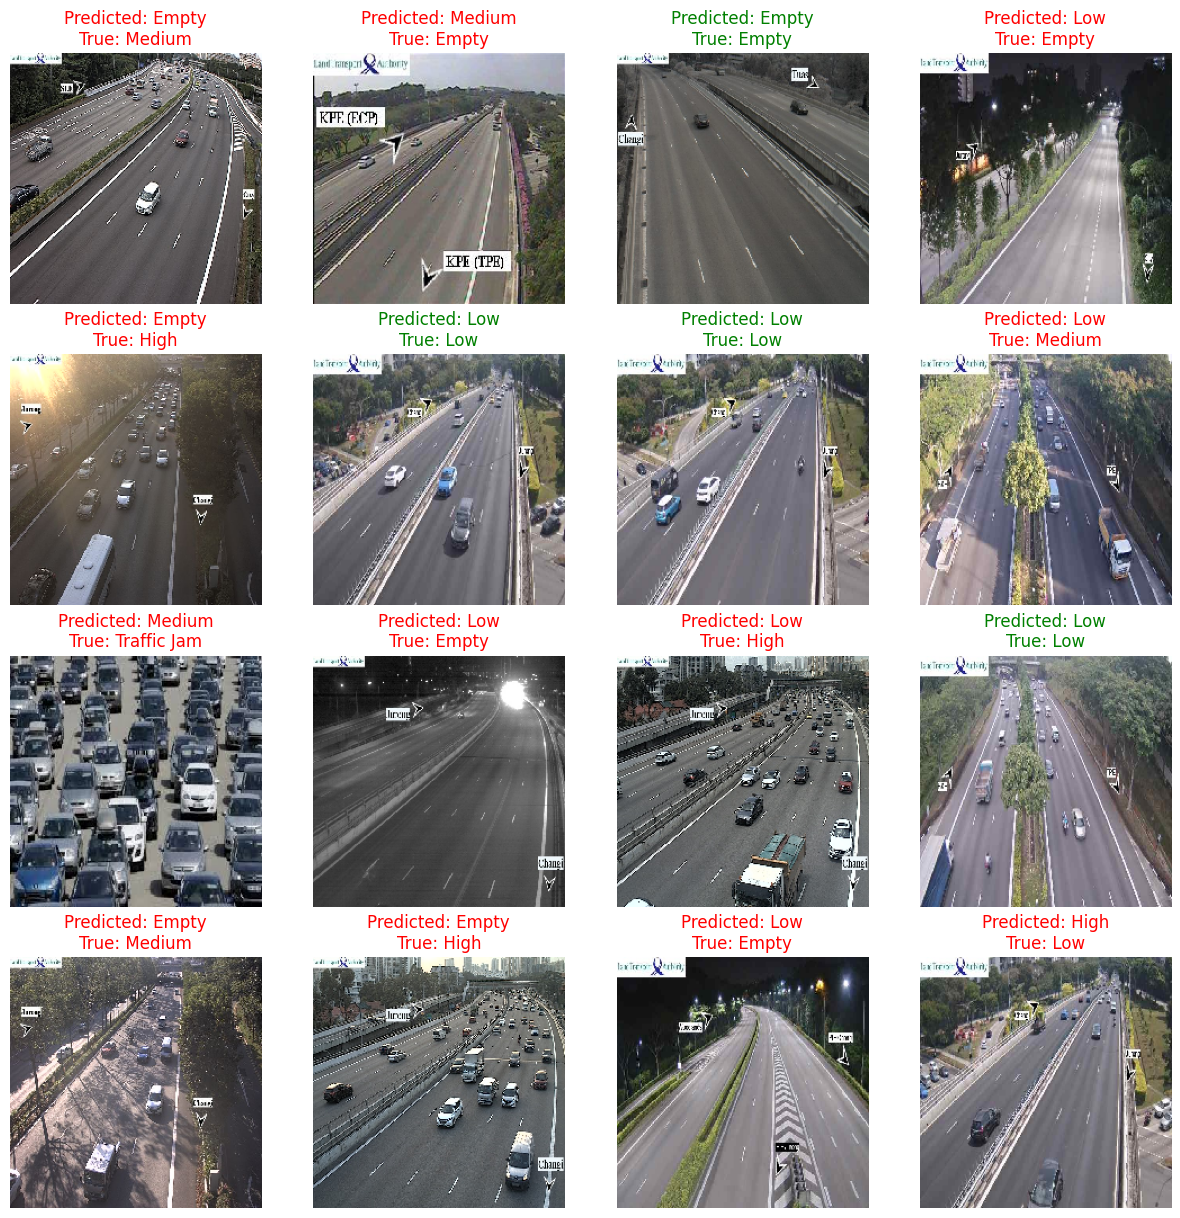

In [ ]:
# Print the predicted and true labels for a subset of test images
n_rows = 4
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

np.random.seed(42)
random_indexes = np.random.choice(len(predicted_labels), size=n_rows*n_cols, replace=False)

for i, index in enumerate(random_indexes):
    img_path = test_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(img_height, img_width))
    axs[i//n_cols, i%n_cols].imshow(img)
    axs[i//n_cols, i%n_cols].axis('off')
    axs[i//n_cols, i%n_cols].set_title("Predicted: {}\nTrue: {}".format(predicted_labels[index], true_labels[index]),
                      color='green' if predicted_labels[index] == true_labels[index] else 'red')
plt.show()